In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('ML_ESE_Batch2.csv')
df

,Store,DayOFridayWednesdayeek,Date,Sales,Customers,Popularity,StateHoliday,SchoolHoliday,IsStoreOpen,PopularityLevel,Store_is_Closed,PromoRunning
0,Store_ID 785,Tuesday,Jan-13,0,0,0.0000,Public Holiday,School Holiday,Store Closed,Low Popularity,1,0
1,Store_ID 785,Wednesday,Jan-13,3418,373,0.0061,No Holiday,School Holiday,Store Open without Promo,Low Popularity,0,0
2,Store_ID 785,Thursday,Jan-13,3731,365,0.0065,No Holiday,School Holiday,Store Open without Promo,Low Popularity,0,0
3,Store_ID 785,Friday,Jan-13,4355,439,0.0091,No Holiday,School Holiday,Store Open without Promo,Low Popularity,0,0
4,Store_ID 785,Saturday,Jan-13,5181,509,0.0126,No Holiday,Schools Open,Store Open without Promo,Low Popularity,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13757,Store_ID 1114,Monday,Jul-15,26720,3468,0.4412,No Holiday,School Holiday,Store Open with Promo,Average Popularity,0,1
13758,Store_ID 1114,Tuesday,Jul-15,25518,3456,0.4199,No Holiday,School Holiday,Store Open with Promo,Average Popularity,0,1
13759,Store_ID 1114,Wednesday,Jul-15,25840,3545,0.4361,No Holiday,School Holiday,Store Open with Promo,Average Popularity,0,1
13760,Store_ID 1114,Thursday,Jul-15,24395,3251,0.3776,No Holiday,School Holiday,Store Open with Promo,Average Popularity,0,1


In [2]:
df.dtypes

Store                      object
DayOFridayWednesdayeek     object
Date                       object
Sales                       int64
Customers                   int64
Popularity                float64
StateHoliday               object
SchoolHoliday              object
IsStoreOpen                object
PopularityLevel            object
Store_is_Closed             int64
PromoRunning                int64
dtype: object

In [3]:
df.isnull().sum()

Store                     0
DayOFridayWednesdayeek    0
Date                      0
Sales                     0
Customers                 0
Popularity                0
StateHoliday              0
SchoolHoliday             0
IsStoreOpen               0
PopularityLevel           0
Store_is_Closed           0
PromoRunning              0
dtype: int64

In [4]:
df.columns

Index(['Store', 'DayOFridayWednesdayeek', 'Date', 'Sales', 'Customers',
       'Popularity', 'StateHoliday', 'SchoolHoliday', 'IsStoreOpen',
       'PopularityLevel', 'Store_is_Closed', 'PromoRunning'],
      dtype='object')

In [5]:
df.describe()

,Sales,Customers,Popularity,Store_is_Closed,PromoRunning
count,13762.000000,13762.000000,13762.000000,13762.000000,13762.000000
mean,7279.040910,878.216320,0.058211,0.155646,0.371458
std,6235.742168,984.936427,0.115517,0.362533,0.483212
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3534.000000,437.000000,0.007600,0.000000,0.000000
50%,6017.500000,593.000000,0.016900,0.000000,0.000000
75%,8890.000000,839.750000,0.035300,0.000000,1.000000
max,38722.000000,5494.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Customers'}>],
       [<Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'Store_is_Closed'}>],
       [<Axes: title={'center': 'PromoRunning'}>, <Axes: >]], dtype=object)

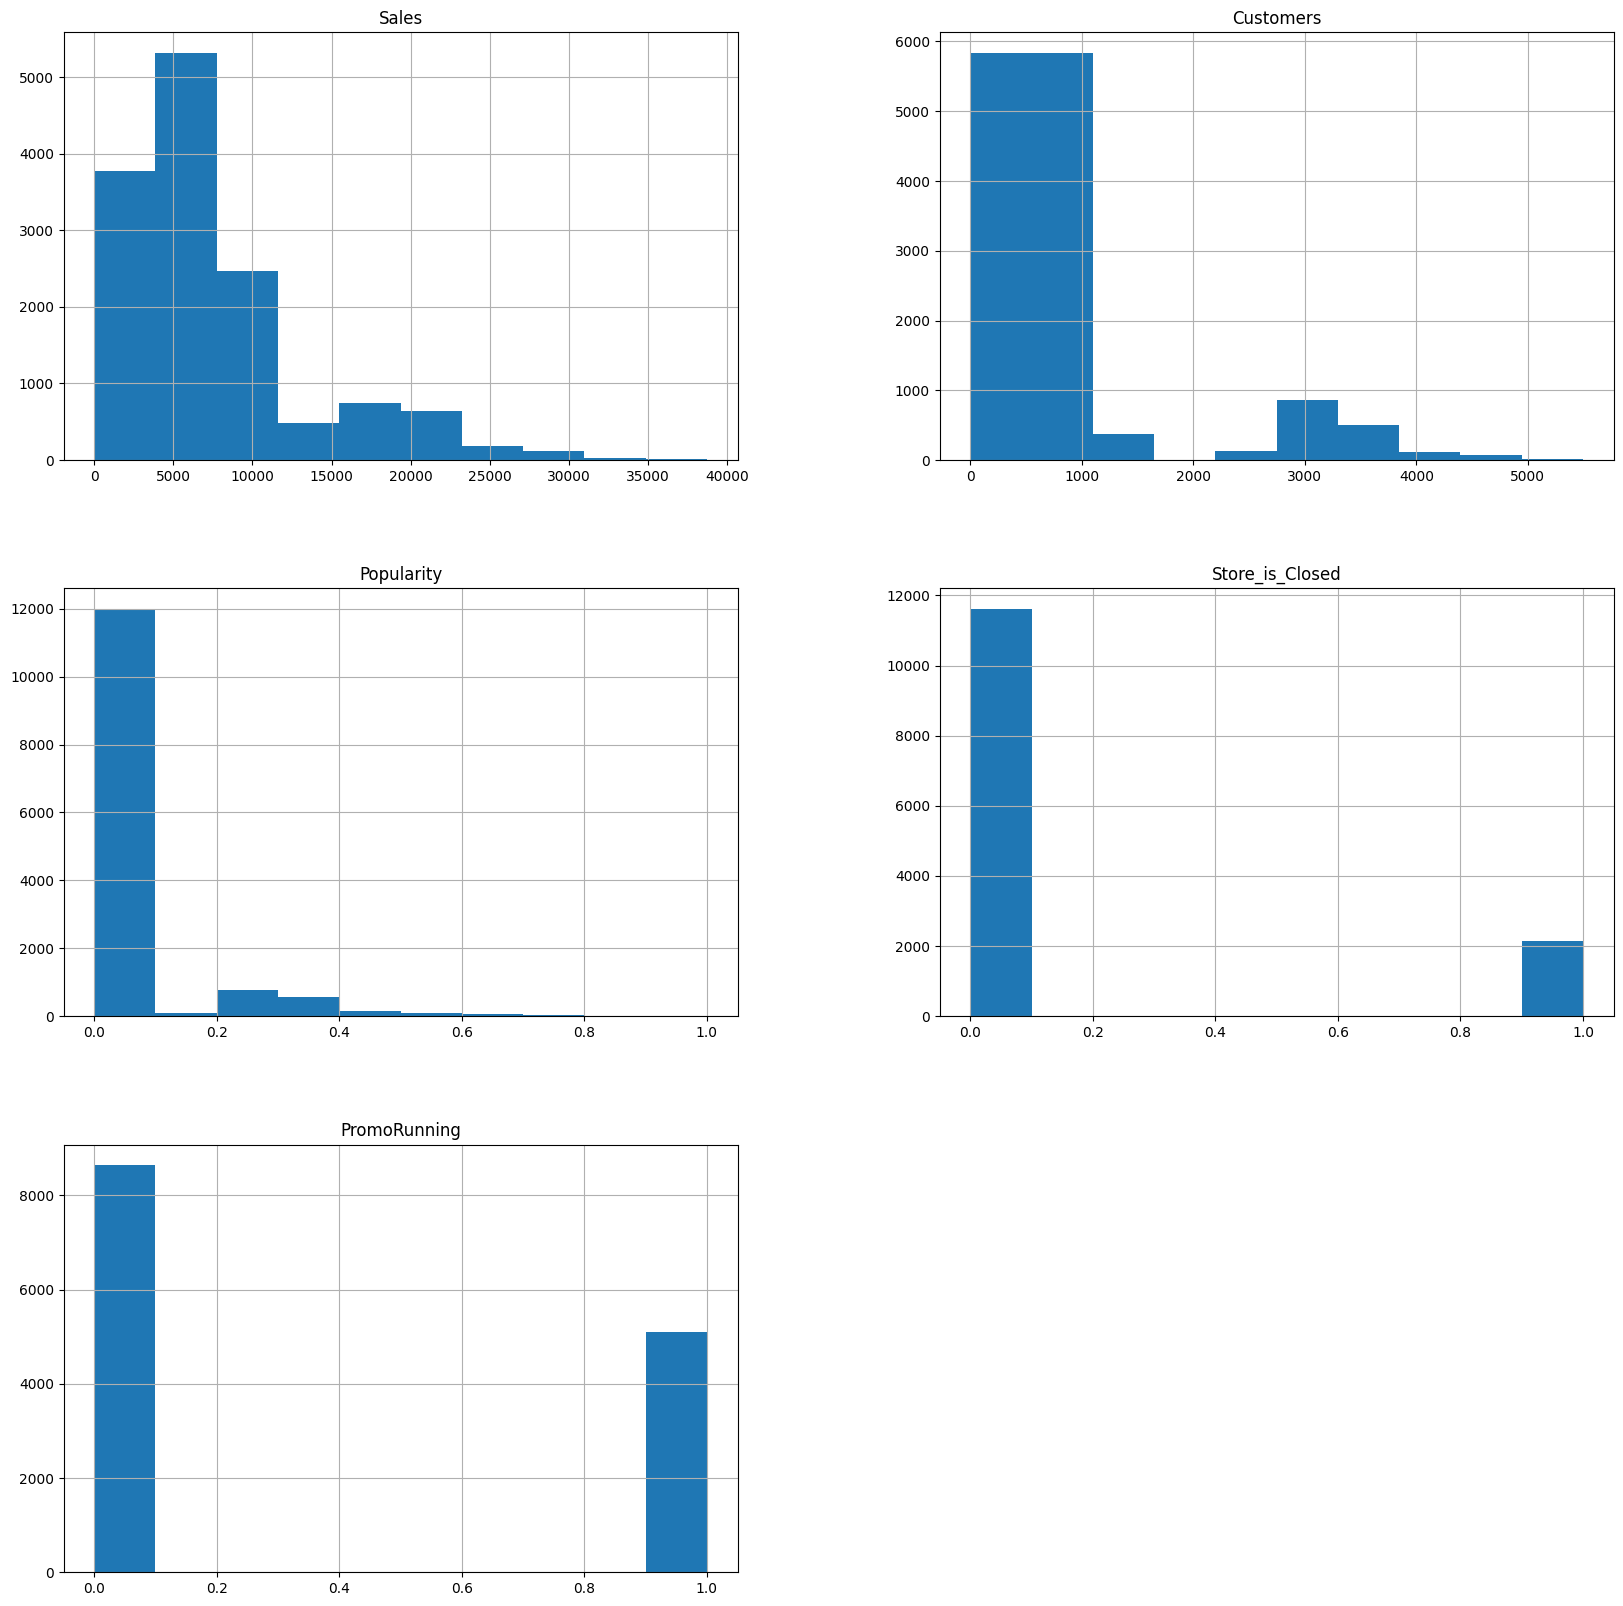

In [6]:
df.hist(figsize = (20,20))

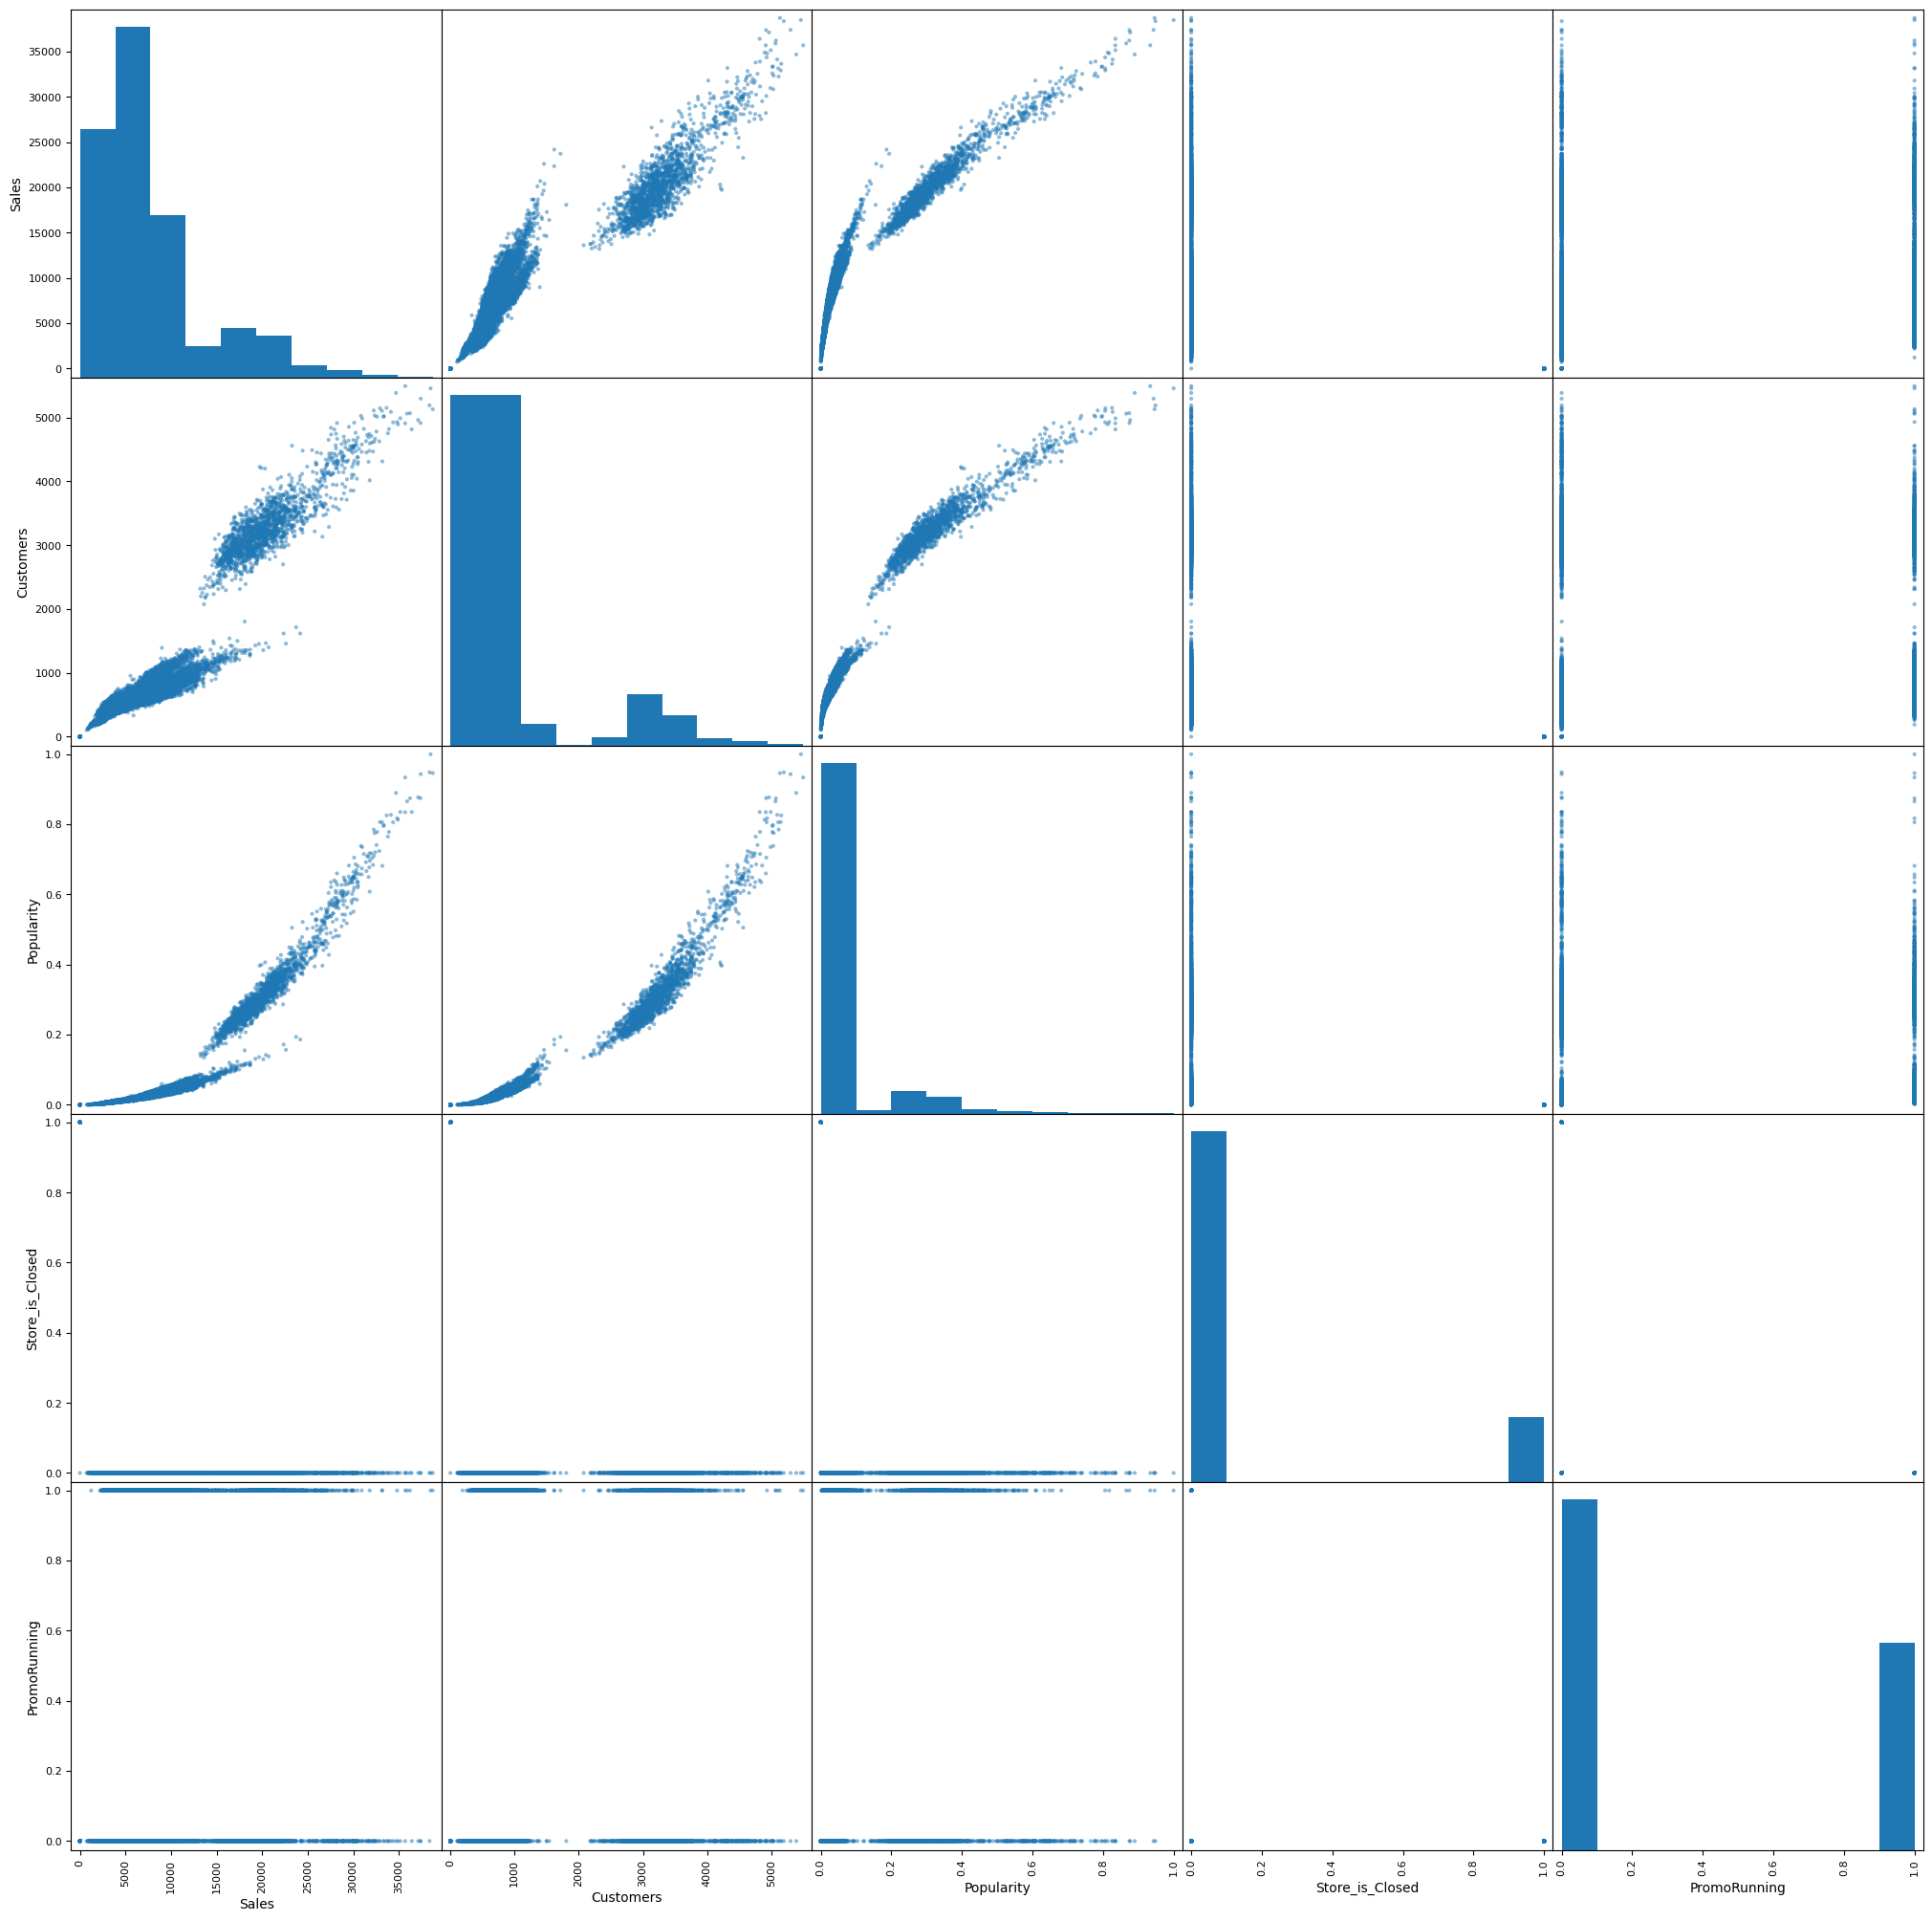

In [7]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

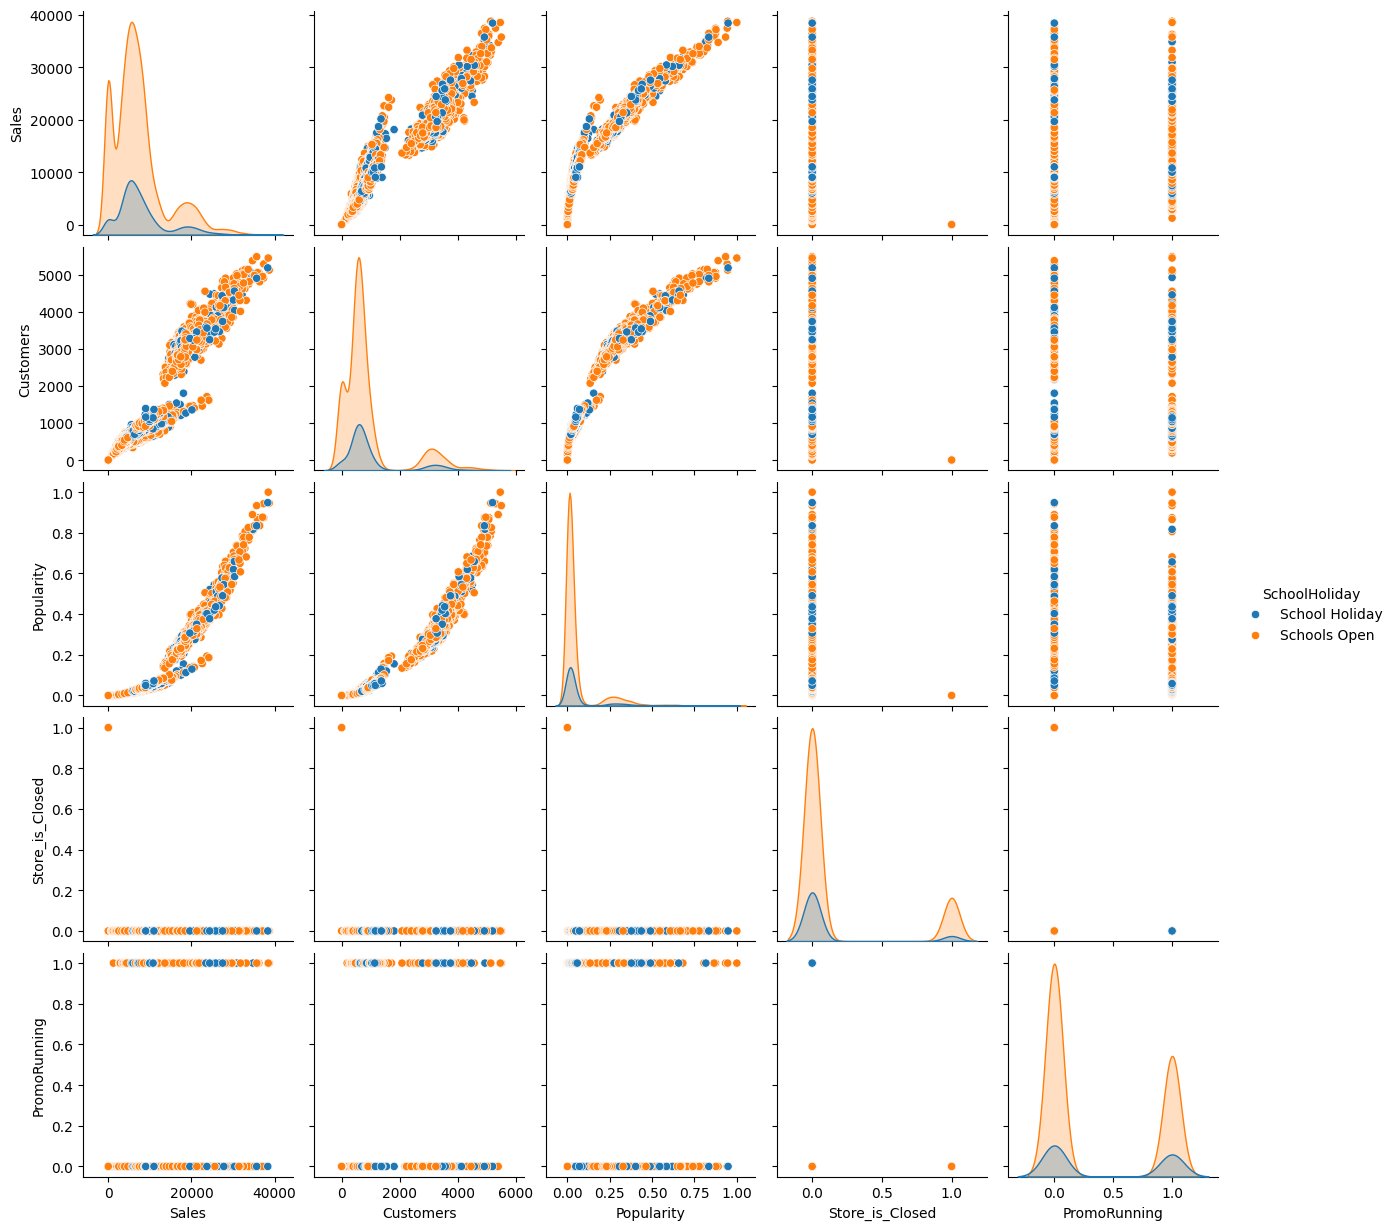

In [8]:
import seaborn as sns
p=sns.pairplot(df, hue = 'SchoolHoliday')

C:\Users\arunp\AppData\Local\Temp\ipykernel_20740\2381343033.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

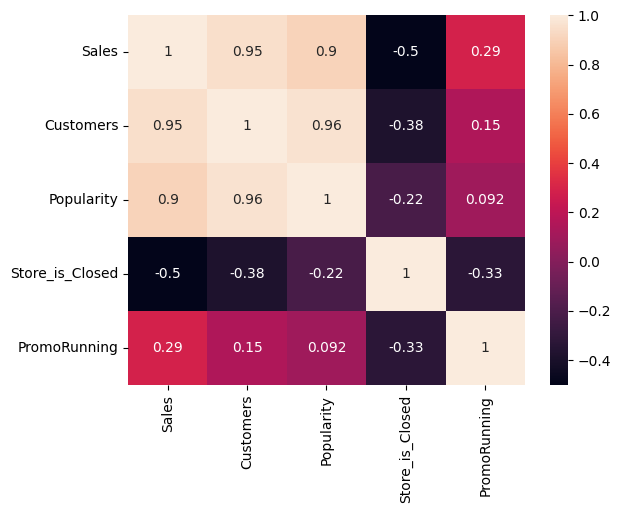

In [9]:
correlation=df.corr()
correlation

sns.heatmap(correlation,annot=True)


<Axes: xlabel='Date', ylabel='Stores'>

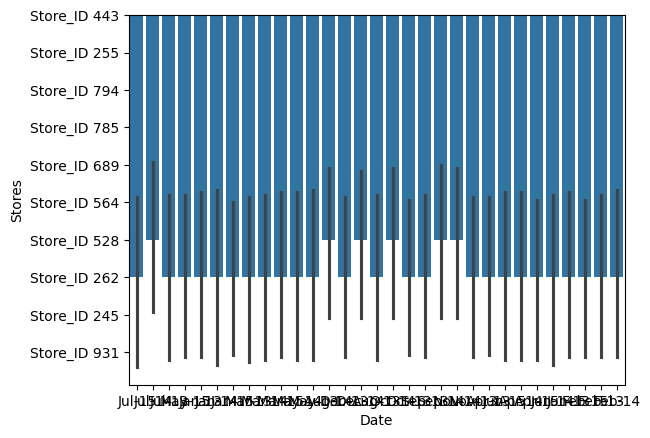

In [10]:
df_v = pd.DataFrame(df[['Date','Store']].value_counts()).reset_index().rename(columns={'index': 'Month-Year', 'Store': 'Stores'})
sns.barplot(x='Date', y='Stores', data=df_v,legend="brief")


In [11]:
x = df.iloc[:,[4,5]] 
x

,Customers,Popularity
0,0,0.0000
1,373,0.0061
2,365,0.0065
3,439,0.0091
4,509,0.0126
...,...,...
13757,3468,0.4412
13758,3456,0.4199
13759,3545,0.4361
13760,3251,0.3776


In [12]:
Y = df.iloc[:,10]
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: Store_is_Closed, dtype: int64

In [13]:
# import matplotlib.pyplot as plt
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(x, method='complete'))

# max_d=7.08
# plt.axhline(y=max_d,c="k")
# plt.show()

In [14]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
kmeans.labels_

C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 0, 0, ..., 1, 1, 4])

In [15]:
kmeans.predict([[0, 0], [12, 3]])

C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3, 3])

In [16]:
kmeans.cluster_centers_


array([[5.52087541e+02, 1.50101988e-02],
       [3.11793158e+03, 2.88974127e-01],
       [9.32222855e+02, 4.42578967e-02],
       [2.55913043e+01, 2.48695652e-04],
       [4.18380251e+03, 5.44054859e-01]])

In [17]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 0, 0, ..., 1, 1, 4])

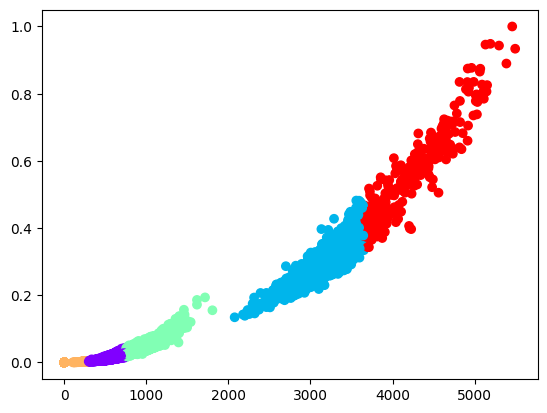

In [18]:
import matplotlib.pyplot as plt
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Customers'],data_with_clusters['Popularity'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.20, random_state=70)

C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

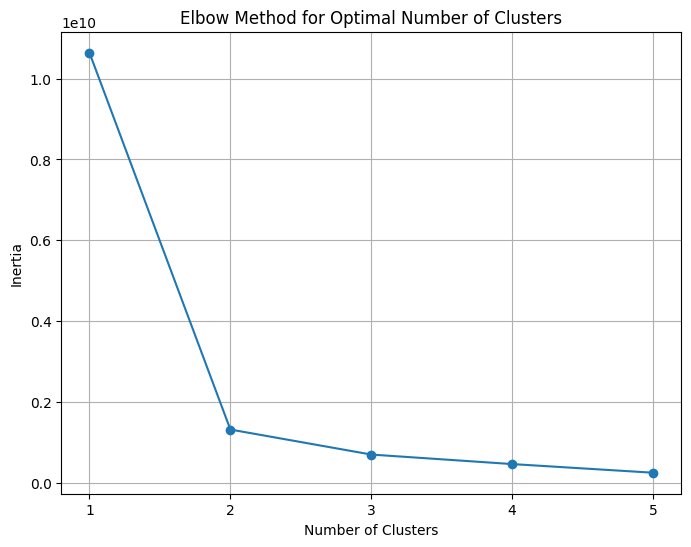

In [20]:
def calculate_inertia(X, max_clusters=7):
    inertia = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=70)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    return inertia
max_clusters = 5
inertia = calculate_inertia(X_train, max_clusters)
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [21]:
df1=pd.read_csv('data_cleaned.csv')

In [22]:
x = df1.iloc[:,[3,4,5,7,8]] 
x

,Sales,Customers,Popularity,SchoolHoliday,IsStoreOpen
0,0,0,0.0000,0,0
1,3418,373,0.0061,0,1
2,3731,365,0.0065,0,1
3,4355,439,0.0091,0,1
4,5181,509,0.0126,1,1
...,...,...,...,...,...
13755,26720,3468,0.4412,0,2
13756,25518,3456,0.4199,0,2
13757,25840,3545,0.4361,0,2
13758,24395,3251,0.3776,0,2


In [23]:
Y = df.iloc[:,10]
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: Store_is_Closed, dtype: int64

In [24]:
df.isnull().sum()

Store                     0
DayOFridayWednesdayeek    0
Date                      0
Sales                     0
Customers                 0
Popularity                0
StateHoliday              0
SchoolHoliday             0
IsStoreOpen               0
PopularityLevel           0
Store_is_Closed           0
PromoRunning              0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=70)

ValueError: Found input variables with inconsistent numbers of samples: [13760, 13762]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
x_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train_scaled,y_train)


LinearRegression()

In [28]:
y_pred=lr.predict(x_test_scaled)
y_pred

array([-0.22924351,  0.231134  , -0.1449959 , ...,  0.15046803,
       -0.10236102, -0.22661382])

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

result1 = r2_score(y_test,y_pred)
print("r2 Score :" ,result1)

result2= mean_absolute_error(y_test,y_pred)
print("MAE :" ,  result2)

result3= mean_squared_error(y_test,y_pred)
print("MSE :" , result3)

r2 Score : 0.27952042829625123
MAE : 0.34681520949382416
MSE : 0.34681520949382416


In [30]:
df1=pd.read_csv('data_cleaned.csv')

In [41]:
x = df1.iloc[:,[3,4]] 
x

,Sales,Customers
0,0,0
1,3418,373
2,3731,365
3,4355,439
4,5181,509
...,...,...
13757,26720,3468
13758,25518,3456
13759,25840,3545
13760,24395,3251


In [42]:
Y = df1.iloc[:,8]
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: IsStoreOpen, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.25, random_state=70)

In [51]:
from sklearn.svm import SVC 
clf = SVC(kernel='linear') 

# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [52]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_train)
print (accuracy_score(y_train, predicted))

0.7470206375351226


In [49]:
from sklearn.metrics import classification_report
features=['radius','texture','perimeter','area','s','c','concavity','cp','sym']
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       636
           1       0.66      0.83      0.73      1936
           2       0.69      0.47      0.56      1557

    accuracy                           0.72      4129
   macro avg       0.78      0.77      0.76      4129
weighted avg       0.72      0.72      0.71      4129



In [59]:
from tensorflow.keras import Model, layers
import tensorflow as tf


In [60]:
# Cancer dataset parameters.
num_classes = 2 # total classes 
num_features = 10 # data features 

# Training parameters.
learning_rate = 0.01
training_steps = 5000
display_step = 500

# Network parameters.
n_hidden_1 = 28 # 1st layer number of neurons.
n_hidden_2 = 56 # 2nd layer number of neurons.

In [61]:
    # Create TF Model.
class NeuralNet(Model):
        # Set layers.
        def __init__(self):
            super(NeuralNet, self).__init__()
            # First fully-connected hidden layer.
            self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
            # First fully-connected hidden layer.
            self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
            # Second fully-connecter hidden layer.
            self.out = layers.Dense(num_classes)

        # Set forward pass.
        def call(self, x, is_training=False):
            x = self.fc1(x)
            x = self.fc2(x)
            x = self.out(x)
            if not is_training:
                # tf cross entropy expect logits without softmax, so only
                # apply softmax when not training.
                x = tf.nn.softmax(x)
            return x

    # Build neural network model.
neural_net = NeuralNet()

In [62]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
# optimizer = tf.optimizers.SGD(learning_rate)
optimizer = tf.optimizers.Adam(learning_rate)
#optimizer = tf.optimizers.RMSprop(learning_rate)
#optimizer = tf.optimizers.Adagrad(learning_rate)


In [63]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = neural_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = neural_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [64]:
for step in range(training_steps):
        run_optimization(X_train, y_train)
    
    
        if(step%display_step==0):
            pred = neural_net(X_train, is_training=True)
            loss = cross_entropy_loss(pred, y_train)
            acc = accuracy(pred, y_train)
            print("loss: %f, accuracy: %f" % ( loss, acc))

AttributeError: Exception encountered when calling layer 'neural_net_2' (type NeuralNet).

'tuple' object has no attribute 'rank'

Call arguments received by layer 'neural_net_2' (type NeuralNet):
  • x=       Sales  Customers
5329    4621        526
10852   2098        249
9567    9582        909
10175   5034        634
12629  16267       2723
...      ...        ...
9532    8071        845
12056  20333       3558
5234       0          0
12502  16879       2964
7502       0          0

[10321 rows x 2 columns]
  • is_training=True

In [65]:
# Test model on validation set.
pred = neural_net(X_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))



AttributeError: Exception encountered when calling layer 'neural_net_2' (type NeuralNet).

'tuple' object has no attribute 'rank'

Call arguments received by layer 'neural_net_2' (type NeuralNet):
  • x=       Sales  Customers
9426   12606       1143
12625  25818       3899
5192    8429        859
8615   10381        690
11225   6511        852
...      ...        ...
7549    6036        608
5697    5395        583
2737    7179        574
1013    2661        479
13651      0          0

[3441 rows x 2 columns]
  • is_training=False